In [0]:
# Gregor von Laszewski laszewski@gmail.com

In [180]:

from cloudmesh.common.util import readfile
from glob import glob
from cloudmesh.common.Shell import Shell
import sys
from io import StringIO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files = glob("outputs/*.out")

print (files)

['outputs/simple-v100-thf2bn-51363727.out', 'outputs/v100-thf2bn-51363728.out', 'outputs/a100-fox-thf2bn-51363720.out', 'outputs/a100-thf2bn-51363737.out', 'outputs/p100-thf2bn-51363724.out', 'outputs/a100-pod-thf2bn-51363721.out', 'outputs/a100-fox-thf2bn-51363738.out', 'outputs/rtx2080-thf2bn-51363725.out', 'outputs/k80-thf2bn-51363723.out', 'outputs/rtx3090-thf2bn-51363726.out']


In [181]:
#def get(value):
    return float(df[df['timer'] == value]["time"])


data = []

for filename in files:
    print (filename)
    content = readfile(filename)
    lines = Shell.find_lines_from(content, "# inference")
    lines = Shell.find_lines_with(lines, "# csv")
    content = "\n".join(lines)
    try:
        #print (content)
        # df = pd.read_csv(content)
        df = pd.read_csv(StringIO(content), sep=",")
        df = df.drop(columns=["# csv", "status", "sum", "start", "uname.node", "user",
                              "uname.system", "platform.version", "msg", "tag"])
        for exclude in ["init",'number_of_ranks', "number_of_nodes", "version",
                        "result", "run_stop", "submission_status"]:
            df = df[df['timer'] != exclude]
        # df = df.drop(rows=["init"])

        df['time'] = df['time'].astype(float)

        total = get("total")
        training = get("training block")
        inference = get("inference block")

        #df[["rest"]] = ["rest", 0.0]

        rest = total - training - inference
        rest_row = pd.DataFrame([{'timer':'rest', 'time': rest}])

        df = pd.concat([df, rest_row], ignore_index=True)
        # df = pd.concat([rest_row,df.loc[:]]).reset_index(drop=True)

        df[["job"]] = filename.replace(".out","").replace("outputs/", "")
        df = df.reset_index()
        df = df.drop(columns=["index"])
        #display(df)
        #print (total, training, inference)
        df.reset_index(drop=True, inplace=True)
        data.append(df)
    except:
        print(f"ERROR: {filename}")

IndentationError: unexpected indent (689541649.py, line 2)

In [176]:
data = pd.concat(data, ignore_index=True)
data

,timer,time,job
0,total,955.439,a100-fox-thf2bn-51363720
1,training block,752.782,a100-fox-thf2bn-51363720
2,training,752.768,a100-fox-thf2bn-51363720
3,loaddata,3.142,a100-fox-thf2bn-51363720
4,training_on_mutiple_GPU,747.875,a100-fox-thf2bn-51363720
5,inference block,202.443,a100-fox-thf2bn-51363720
6,inference,0.022,a100-fox-thf2bn-51363720
7,load model,0.454,a100-fox-thf2bn-51363720
8,read inference files,0.009,a100-fox-thf2bn-51363720
9,rest,0.214,a100-fox-thf2bn-51363720


In [177]:
total = data[data['timer'] == "total"]
total = total.sort_values(by=['time'], ascending=False)
total = total.reset_index()

def simplify_job(name):
   return " ".join(name.split("-")[:-2]).replace("fox", "special")

total["job"] = total["job"].apply(simplify_job)
total = total.drop(columns=["index"])

# total["job"] = total["job"].apply(simplify_job)
# total = total.drop(columns=["index"])

total

,timer,time,job
0,total,1553.553,k80
1,total,1012.015,p100
2,total,955.439,a100 special
3,total,713.581,rtx3090
4,total,712.589,a100
5,total,710.565,a100 special


In [178]:
def save(name, plot, dpi=300, directory="images"):
    Shell.mkdir(directory)
    plot.figure.savefig(f"{name}.svg")
    plot.figure.savefig(f"{name}.png", dpi=dpi)
    plot.figure.savefig(f"{name}.pdf")
    plot.figure.savefig(f"{name}.tiff, dpi=300")

Text(0.5, 1.0, 'Runtime Comparision of Rivanna GPUs')

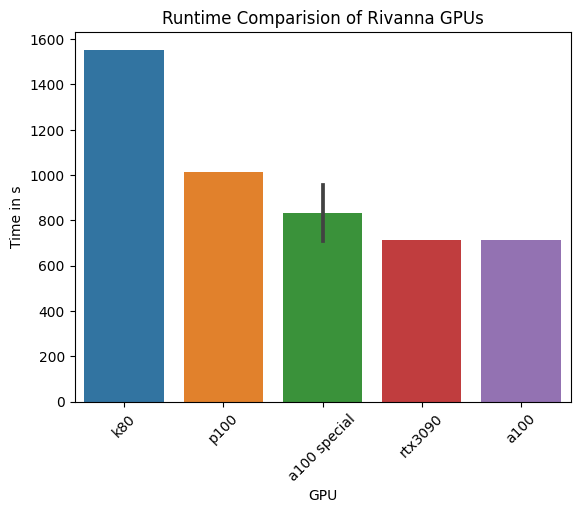

In [179]:
plt.xticks(rotation=45)
p = sns.barplot(total, x="job", y="time")
p.set(xlabel = "GPU", ylabel = "Time in s")
p.set_title("Runtime Comparision of Rivanna GPUs")